In [71]:
import pandas as pd
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv('Business Analyst _ Assignment _ Dataset (1).csv')
df

,Attributed Touch Time,Install Time,Event Time,Event Name,Parameters,Event Revenue,Cost Model,Cost Value,Partner,Media Source,...,App Version,SDK Version,App ID,App Name,Is Retargeting,Retargeting Conversion Type,Is Primary Attribution,Reengagement Window,Original URL,Device Model
0,2/24/2024 0:19,2/24/2024 0:29,2/25/2024 23:59,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",2318.41,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,OPPO::CPH2127
1,2/25/2024 23:33,2/25/2024 23:40,2/25/2024 23:58,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",412.80,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,Redmi::Redmi 8A Dual
2,2/25/2024 23:40,2/25/2024 23:51,2/25/2024 23:55,app_order_placed,"{""has_coupon_code"":true,""selling_price_total_a...",289.40,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,samsung::SM-A042F
3,2/23/2024 23:53,2/24/2024 0:01,2/25/2024 23:52,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",570.61,NaN,NaN,NaN,Trophywise,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,False,NaN,NaN,samsung::SM-M136B
4,2/25/2024 19:14,2/25/2024 19:20,2/25/2024 23:52,app_order_placed,"{""af_currency"":""INR"",""is_addons_added"":false,""...",NaN,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,samsung::SM-A505F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84213,2/1/2024 0:12,2/1/2024 0:13,2/1/2024 0:18,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",796.00,NaN,NaN,NaN,Trophywise,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,samsung::SM-S901E
84214,2/1/2024 0:05,2/1/2024 0:05,2/1/2024 0:17,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",182.00,NaN,NaN,NaN,Trophywise,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,HONOR::LND-AL30
84215,2/1/2024 0:00,2/1/2024 0:05,2/1/2024 0:15,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",583.40,NaN,NaN,NaN,Rocketship,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,xiaomi::Redmi 6
84216,2/1/2024 0:11,2/1/2024 0:12,2/1/2024 0:13,app_order_placed,"{""has_coupon_code"":false,""selling_price_total_...",133.16,NaN,NaN,NaN,Trophywise,...,6.7.1,v6.12.1,com.intellihealth.truemeds,Truemeds - Healthcare App,False,NaN,True,NaN,NaN,OnePlus::CPH2447


In [20]:
def expand_json(df, column_name):
    try:
        json_data = df[column_name].apply(json.loads)
    except Exception as e:
        print(f"Error in parsing JSON data: {e}")
        return df
    
    try:
        json_df = pd.json_normalize(json_data)
    except Exception as e:
        print(f"Error in normalizing JSON data: {e}")
        return df
    
    df_expanded = pd.concat([df.drop(columns=[column_name]), json_df], axis=1)
    return df_expanded

df_expanded = expand_json(df, 'Parameters')
print("Expanded DataFrame:")
df_expanded.head()


Expanded DataFrame:


,Attributed Touch Time,Install Time,Event Time,Event Name,Event Revenue,Cost Model,Cost Value,Partner,Media Source,Channel,...,delivery_charge_amount,coupon_discount_amount,coupon_applied,tm_reward_amount,tm_credit_amount,product_code,savings_amount,no_of_item,customer_id,subs_source
0,2/24/2024 0:19,2/24/2024 0:29,2/25/2024 23:59,app_order_placed,2318.41,NaN,NaN,NaN,Rocketship,Rocketship Partner 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/25/2024 23:33,2/25/2024 23:40,2/25/2024 23:58,app_order_placed,412.80,NaN,NaN,NaN,Rocketship,Rocketship Partner 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/25/2024 23:40,2/25/2024 23:51,2/25/2024 23:55,app_order_placed,289.40,NaN,NaN,NaN,Rocketship,Rocketship Partner 4,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/23/2024 23:53,2/24/2024 0:01,2/25/2024 23:52,app_order_placed,570.61,NaN,NaN,NaN,Trophywise,Trophywise Partner 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/25/2024 19:14,2/25/2024 19:20,2/25/2024 23:52,app_order_placed,NaN,NaN,NaN,NaN,Rocketship,Rocketship Partner 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:

print("Columns in the expanded DataFrame:")
df_expanded.columns


Columns in the expanded DataFrame:


Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Event Revenue', 'Cost Model', 'Cost Value', 'Partner', 'Media Source',
       'Channel', 'Campaign ID', 'Country Code', 'State', 'City', 'Operator',
       'Carrier', 'Language', 'Unnamed: 18', 'Unnamed: 19', 'Device Category',
       'Platform', 'OS Version', 'App Version', 'SDK Version', 'App ID',
       'App Name', 'Is Retargeting', 'Retargeting Conversion Type',
       'Is Primary Attribution', 'Reengagement Window', 'Original URL',
       'Device Model', 'has_coupon_code', 'selling_price_total_amount',
       'discount_amount', 'no_of_items', 'is_switch_added', 'af_currency',
       'packaging_charge_amount', 'is_addons_added', 'af_revenue',
       'is_core_customer', 'mrp_total_amount', 'estimated_payable_amount',
       'reposr', 'delivery_charge_amount', 'coupon_discount_amount',
       'coupon_applied', 'tm_reward_amount', 'tm_credit_amount',
       'product_code', 'savings_amount', 'no_of_item

In [22]:
#df_expanded.to_csv('Truemed_dataset.csv', index=False)

In [128]:
dt = pd.read_csv('Truemed_dataset.csv')
dt

,Attributed Touch Time,Install Time,Event Time,Event Name,Event Revenue,Cost Model,Cost Value,Partner,Media Source,Channel,...,delivery_charge_amount,coupon_discount_amount,coupon_applied,tm_reward_amount,tm_credit_amount,product_code,savings_amount,no_of_item,customer_id,subs_source
0,2/24/2024 0:19,2/24/2024 0:29,2/25/2024 23:59,app_order_placed,2318.41,NaN,NaN,NaN,Rocketship,Rocketship Partner 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/25/2024 23:33,2/25/2024 23:40,2/25/2024 23:58,app_order_placed,412.80,NaN,NaN,NaN,Rocketship,Rocketship Partner 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/25/2024 23:40,2/25/2024 23:51,2/25/2024 23:55,app_order_placed,289.40,NaN,NaN,NaN,Rocketship,Rocketship Partner 4,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/23/2024 23:53,2/24/2024 0:01,2/25/2024 23:52,app_order_placed,570.61,NaN,NaN,NaN,Trophywise,Trophywise Partner 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/25/2024 19:14,2/25/2024 19:20,2/25/2024 23:52,app_order_placed,NaN,NaN,NaN,NaN,Rocketship,Rocketship Partner 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84213,2/1/2024 0:12,2/1/2024 0:13,2/1/2024 0:18,app_order_placed,796.00,NaN,NaN,NaN,Trophywise,Trophywise Partner 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84214,2/1/2024 0:05,2/1/2024 0:05,2/1/2024 0:17,app_order_placed,182.00,NaN,NaN,NaN,Trophywise,Trophywise Partner 2,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84215,2/1/2024 0:00,2/1/2024 0:05,2/1/2024 0:15,app_order_placed,583.40,NaN,NaN,NaN,Rocketship,Rocketship Partner 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84216,2/1/2024 0:11,2/1/2024 0:12,2/1/2024 0:13,app_order_placed,133.16,NaN,NaN,NaN,Trophywise,Trophywise Partner 2,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the datatypes of the data :

In [129]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84218 entries, 0 to 84217
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attributed Touch Time        84218 non-null  object 
 1   Install Time                 84218 non-null  object 
 2   Event Time                   84218 non-null  object 
 3   Event Name                   84218 non-null  object 
 4   Event Revenue                80057 non-null  float64
 5   Cost Model                   0 non-null      float64
 6   Cost Value                   0 non-null      float64
 7   Partner                      0 non-null      float64
 8   Media Source                 84218 non-null  object 
 9   Channel                      84218 non-null  object 
 10  Campaign ID                  84218 non-null  float64
 11  Country Code                 84218 non-null  object 
 12  State                        84218 non-null  object 
 13  City            

In [130]:
#df['Install Time'] = pd.to_datetime(df['Install Time'])
#df['Event Time'] = pd.to_datetime(df['Event Time'])

In [131]:
dt.isnull().sum()

Attributed Touch Time              0
Install Time                       0
Event Time                         0
Event Name                         0
Event Revenue                   4161
Cost Model                     84218
Cost Value                     84218
Partner                        84218
Media Source                       0
Channel                            0
Campaign ID                        0
Country Code                       0
State                              0
City                               0
Operator                       46431
Carrier                        47048
Language                       46241
Unnamed: 18                    84218
Unnamed: 19                    84218
Device Category                46241
Platform                           0
OS Version                     46241
App Version                        0
SDK Version                    46241
App ID                             0
App Name                       46241
Is Retargeting                     0
R

Here we can see that there are all null values in some column ,ie no values present in that column,So we can remove that column.

In [132]:
null_counts = dt.isnull().sum()
cols = null_counts[null_counts == 84218].index.tolist()

print("Columns with null count of 84218:")
for i in cols:
    print(i)

Columns with null count of 84218:
Cost Model
Cost Value
Partner
Unnamed: 18
Unnamed: 19
Retargeting Conversion Type
Reengagement Window
Original URL


In [133]:
dt = dt.drop(columns=cols)
dt

,Attributed Touch Time,Install Time,Event Time,Event Name,Event Revenue,Media Source,Channel,Campaign ID,Country Code,State,...,delivery_charge_amount,coupon_discount_amount,coupon_applied,tm_reward_amount,tm_credit_amount,product_code,savings_amount,no_of_item,customer_id,subs_source
0,2/24/2024 0:19,2/24/2024 0:29,2/25/2024 23:59,app_order_placed,2318.41,Rocketship,Rocketship Partner 2,2.385290e+16,IN,BR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/25/2024 23:33,2/25/2024 23:40,2/25/2024 23:58,app_order_placed,412.80,Rocketship,Rocketship Partner 4,2.385290e+16,IN,JK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/25/2024 23:40,2/25/2024 23:51,2/25/2024 23:55,app_order_placed,289.40,Rocketship,Rocketship Partner 4,1.202037e+17,IN,KL,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/23/2024 23:53,2/24/2024 0:01,2/25/2024 23:52,app_order_placed,570.61,Trophywise,Trophywise Partner 1,1.975867e+10,IN,WB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/25/2024 19:14,2/25/2024 19:20,2/25/2024 23:52,app_order_placed,NaN,Rocketship,Rocketship Partner 1,2.385290e+16,IN,MP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84213,2/1/2024 0:12,2/1/2024 0:13,2/1/2024 0:18,app_order_placed,796.00,Trophywise,Trophywise Partner 2,2.083574e+10,IN,UP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84214,2/1/2024 0:05,2/1/2024 0:05,2/1/2024 0:17,app_order_placed,182.00,Trophywise,Trophywise Partner 2,1.976969e+10,IN,WB,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84215,2/1/2024 0:00,2/1/2024 0:05,2/1/2024 0:15,app_order_placed,583.40,Rocketship,Rocketship Partner 3,1.202036e+17,IN,WB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84216,2/1/2024 0:11,2/1/2024 0:12,2/1/2024 0:13,app_order_placed,133.16,Trophywise,Trophywise Partner 2,1.976969e+10,IN,DL,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking remaining null values:

In [134]:
dt.isnull().sum()

Attributed Touch Time             0
Install Time                      0
Event Time                        0
Event Name                        0
Event Revenue                  4161
Media Source                      0
Channel                           0
Campaign ID                       0
Country Code                      0
State                             0
City                              0
Operator                      46431
Carrier                       47048
Language                      46241
Device Category               46241
Platform                          0
OS Version                    46241
App Version                       0
SDK Version                   46241
App ID                            0
App Name                      46241
Is Retargeting                    0
Is Primary Attribution            0
Device Model                  46241
has_coupon_code                   0
selling_price_total_amount     4142
discount_amount                4292
no_of_items                 

In [135]:
fill_zero_cols = [
    'Event Revenue', 'selling_price_total_amount', 'discount_amount',
    'no_of_items', 'packaging_charge_amount', 'af_revenue', 'mrp_total_amount',
    'estimated_payable_amount', 'delivery_charge_amount', 'coupon_discount_amount',
    'tm_reward_amount', 'tm_credit_amount',"savings_amount"
]

fill_unknown_cols = [
    'Operator', 'Carrier', 'Language', 'Device Category', 'App Name',"OS Version",
    'SDK Version', 'Device Model', 'af_currency'
]

fill_none_cols = ['coupon_applied']

dt[fill_zero_cols] = dt[fill_zero_cols].fillna(0)
dt[fill_unknown_cols] = dt[fill_unknown_cols].fillna('unknown')
dt[fill_none_cols] = dt[fill_none_cols].fillna('none')
dt.isnull().sum()

Attributed Touch Time             0
Install Time                      0
Event Time                        0
Event Name                        0
Event Revenue                     0
Media Source                      0
Channel                           0
Campaign ID                       0
Country Code                      0
State                             0
City                              0
Operator                          0
Carrier                           0
Language                          0
Device Category                   0
Platform                          0
OS Version                        0
App Version                       0
SDK Version                       0
App ID                            0
App Name                          0
Is Retargeting                    0
Is Primary Attribution            0
Device Model                      0
has_coupon_code                   0
selling_price_total_amount        0
discount_amount                   0
no_of_items                 

There are columns which have amount related data,which we can fill will **0** and some categorical values which we can fill with **unknown** and similarly some columns filled with **none** for coupouns data which we have no idea about.And others cols we can leave it like that.

Now after data cleaning ,we will proceed towards the analysis part,where we can get detailes analysis 

In [136]:
dt.columns

Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'Country Code', 'State', 'City', 'Operator', 'Carrier', 'Language',
       'Device Category', 'Platform', 'OS Version', 'App Version',
       'SDK Version', 'App ID', 'App Name', 'Is Retargeting',
       'Is Primary Attribution', 'Device Model', 'has_coupon_code',
       'selling_price_total_amount', 'discount_amount', 'no_of_items',
       'is_switch_added', 'af_currency', 'packaging_charge_amount',
       'is_addons_added', 'af_revenue', 'is_core_customer', 'mrp_total_amount',
       'estimated_payable_amount', 'reposr', 'delivery_charge_amount',
       'coupon_discount_amount', 'coupon_applied', 'tm_reward_amount',
       'tm_credit_amount', 'product_code', 'savings_amount', 'no_of_item',
       'customer_id', 'subs_source'],
      dtype='object')

### Analysis :

1)Which media source has the biggest delta between install time & event time? What is the
average time from install to the 3 events? Given the three events and funnel shared, can you
provide a reasoning for this delay from install?

In [138]:
dt['Delta'] = (df['Event Time'] - df['Install Time']).dt.total_seconds() / 60

media_delta = dt.groupby('Media Source')['Delta'].mean().reset_index()
max_media_delta = media_delta.loc[media_delta['Delta'].idxmax()]

avg_times = dt.groupby('Event Name')['Delta'].mean().reset_index()

print(max_media_delta)
print(avg_times)

Media Source    Rocketship
Delta           4481.21172
Name: 0, dtype: object
         Event Name        Delta
0  app_order_placed  2887.527582
1      box_verified  3813.078501
2   order_delivered  6803.697385


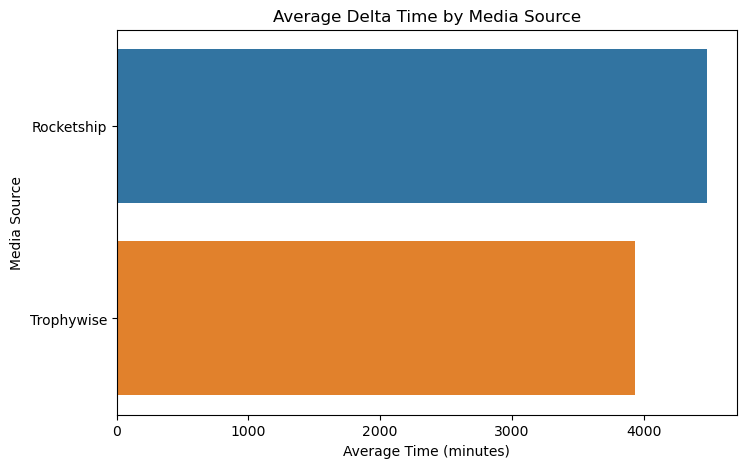

In [118]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Delta', y='Media Source', data=media_delta)
plt.title('Average Delta Time by Media Source')
plt.xlabel('Average Time (minutes)')
plt.ylabel('Media Source')
plt.show()

<Figure size 1000x600 with 0 Axes>

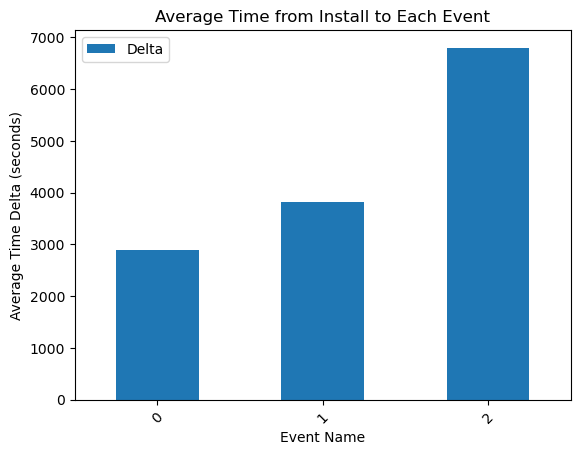

In [139]:
plt.figure(figsize=(10, 6))
avg_times.plot(kind='bar')
plt.title('Average Time from Install to Each Event')
plt.xlabel('Event Name')
plt.ylabel('Average Time Delta (seconds)')
plt.xticks(rotation=45)
plt.show()

2)What is the most revenue driving channel? Put a case forward for where you can accurately
visualise the revenue driven vs quality factors ( ‘core customers’ who accepts the ‘switch’,
‘does not use coupon’ can be considered as quality metrics)

In [140]:
# Calculate total revenue for each channel
channel_revenue = dt.groupby('Channel')['Event Revenue'].sum().reset_index()
most_revenue_channel = channel_revenue.loc[channel_revenue['Event Revenue'].idxmax()]

print("Most revenue-driving channel:")
print(most_revenue_channel)

Most revenue-driving channel:
Channel          Trophywise Partner 2
Event Revenue             46087751.42
Name: 6, dtype: object


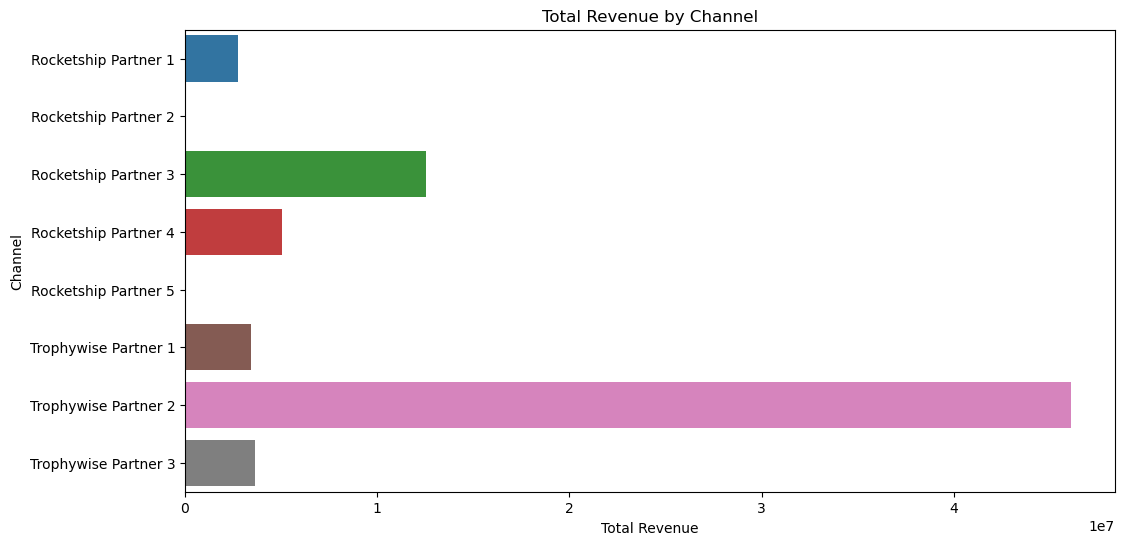

In [141]:
#total revenue by channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Event Revenue', y='Channel', data=channel_revenue)
plt.title('Total Revenue by Channel')
plt.xlabel('Total Revenue')
plt.ylabel('Channel')
plt.show()


In [142]:
print(dt.columns)

Index(['Attributed Touch Time', 'Install Time', 'Event Time', 'Event Name',
       'Event Revenue', 'Media Source', 'Channel', 'Campaign ID',
       'Country Code', 'State', 'City', 'Operator', 'Carrier', 'Language',
       'Device Category', 'Platform', 'OS Version', 'App Version',
       'SDK Version', 'App ID', 'App Name', 'Is Retargeting',
       'Is Primary Attribution', 'Device Model', 'has_coupon_code',
       'selling_price_total_amount', 'discount_amount', 'no_of_items',
       'is_switch_added', 'af_currency', 'packaging_charge_amount',
       'is_addons_added', 'af_revenue', 'is_core_customer', 'mrp_total_amount',
       'estimated_payable_amount', 'reposr', 'delivery_charge_amount',
       'coupon_discount_amount', 'coupon_applied', 'tm_reward_amount',
       'tm_credit_amount', 'product_code', 'savings_amount', 'no_of_item',
       'customer_id', 'subs_source', 'Delta'],
      dtype='object')


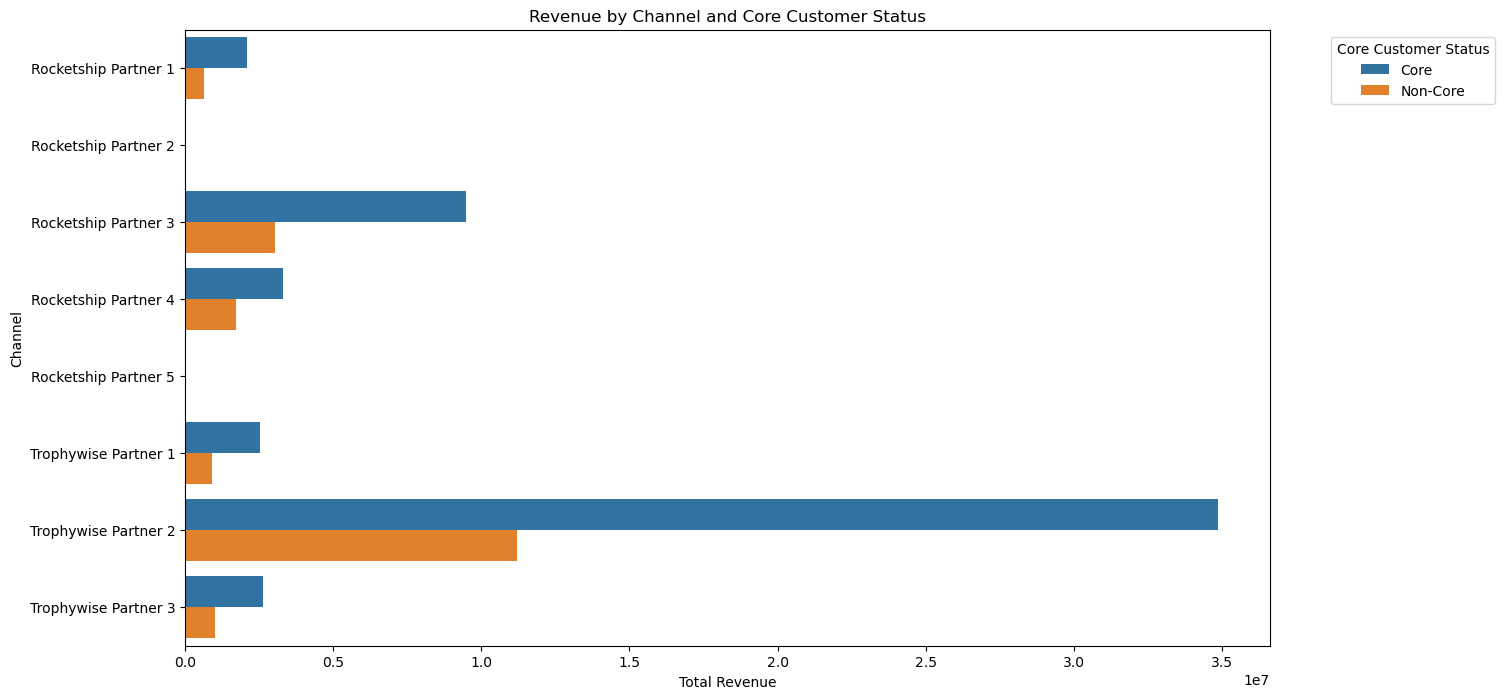

In [143]:
dt['Is Core Customer'] = dt['is_core_customer'].map({1: 'Core', 0: 'Non-Core'})

core_customer_revenue = dt.groupby(['Channel', 'Is Core Customer'])['Event Revenue'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Event Revenue', y='Channel', hue='Is Core Customer', data=core_customer_revenue)
plt.title('Revenue by Channel and Core Customer Status')
plt.xlabel('Total Revenue')
plt.ylabel('Channel')
plt.legend(title='Core Customer Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3)Location level analysis: Given the current dataset, which are the top locations in terms of
coupon usage, switch medicines, & gets max core customers)

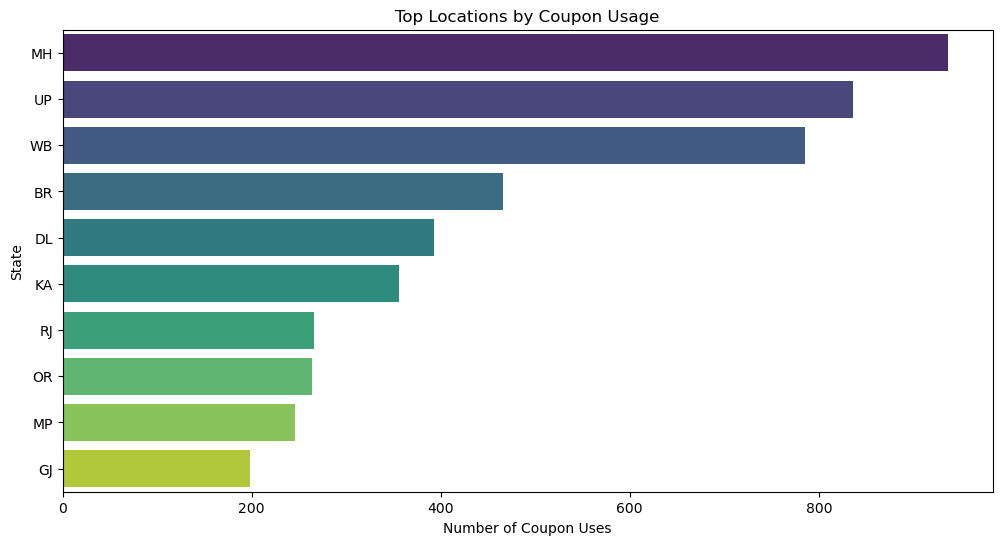

In [144]:
coupon_usage = dt[dt['coupon_applied'] != 'none'].groupby('State').size().reset_index(name='Coupon Usage')
switch_acceptance = dt[dt['is_switch_added'] == 1].groupby('State').size().reset_index(name='Switch Accepted')
core_customers = dt[dt['is_core_customer'] == 1].groupby('State').size().reset_index(name='Core Customers')

location_metrics = pd.merge(coupon_usage, switch_acceptance, on='State', how='outer')
location_metrics = pd.merge(location_metrics, core_customers, on='State', how='outer')

plt.figure(figsize=(12, 6))
top_coupon_usage = location_metrics.sort_values(by='Coupon Usage', ascending=False).head(10)
sns.barplot(x='Coupon Usage', y='State', data=top_coupon_usage, palette='viridis')
plt.title('Top Locations by Coupon Usage')
plt.xlabel('Number of Coupon Uses')
plt.ylabel('State')
plt.show()

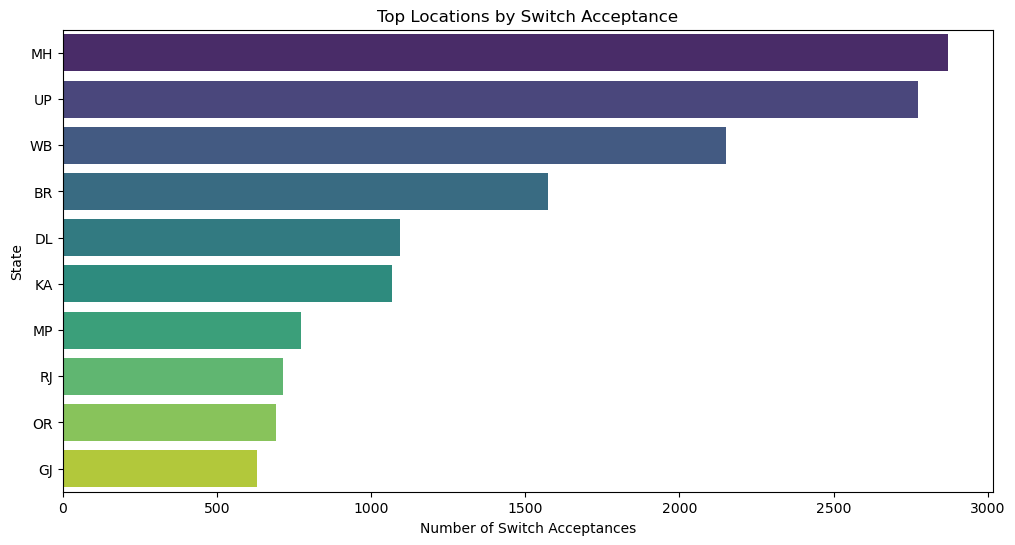

In [145]:
plt.figure(figsize=(12, 6))
top_switch_acceptance = location_metrics.sort_values(by='Switch Accepted', ascending=False).head(10)
sns.barplot(x='Switch Accepted', y='State', data=top_switch_acceptance, palette='viridis')
plt.title('Top Locations by Switch Acceptance')
plt.xlabel('Number of Switch Acceptances')
plt.ylabel('State')
plt.show()

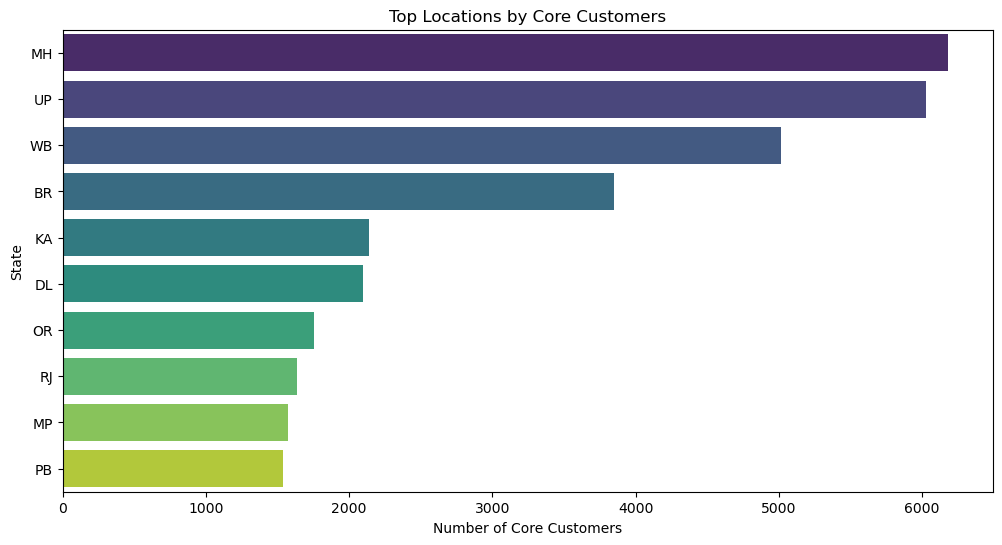

In [146]:
plt.figure(figsize=(12, 6))
top_core_customers = location_metrics.sort_values(by='Core Customers', ascending=False).head(10)
sns.barplot(x='Core Customers', y='State', data=top_core_customers, palette='viridis')
plt.title('Top Locations by Core Customers')
plt.xlabel('Number of Core Customers')
plt.ylabel('State')
plt.show()

4)If you were to advise the marketing team to double down on spending on such campaigns,
which are the top campaigns to increase spending and why?

In [147]:
campaign_revenue = dt.groupby('Campaign ID')['Event Revenue'].sum().reset_index(name='Total Revenue')
campaign_coupon_usage = dt[dt['coupon_applied'] != 'none'].groupby('Campaign ID').size().reset_index(name='Coupon Usage')
campaign_switch_acceptance = dt[dt['is_switch_added'] == 1].groupby('Campaign ID').size().reset_index(name='Switch Accepted')
campaign_core_customers = dt[dt['is_core_customer'] == 1].groupby('Campaign ID').size().reset_index(name='Core Customers')

campaign_metrics = pd.merge(campaign_revenue, campaign_coupon_usage, on='Campaign ID', how='outer')
campaign_metrics = pd.merge(campaign_metrics, campaign_switch_acceptance, on='Campaign ID', how='outer')
campaign_metrics = pd.merge(campaign_metrics, campaign_core_customers, on='Campaign ID', how='outer')


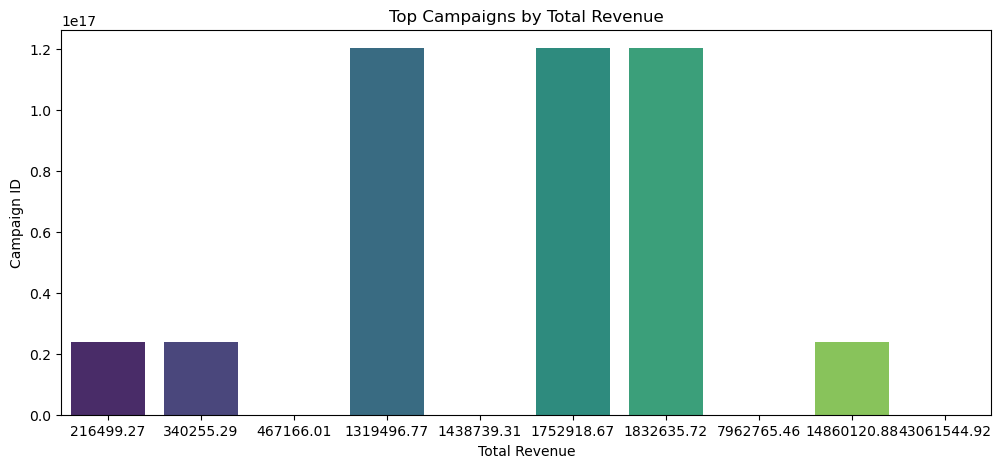

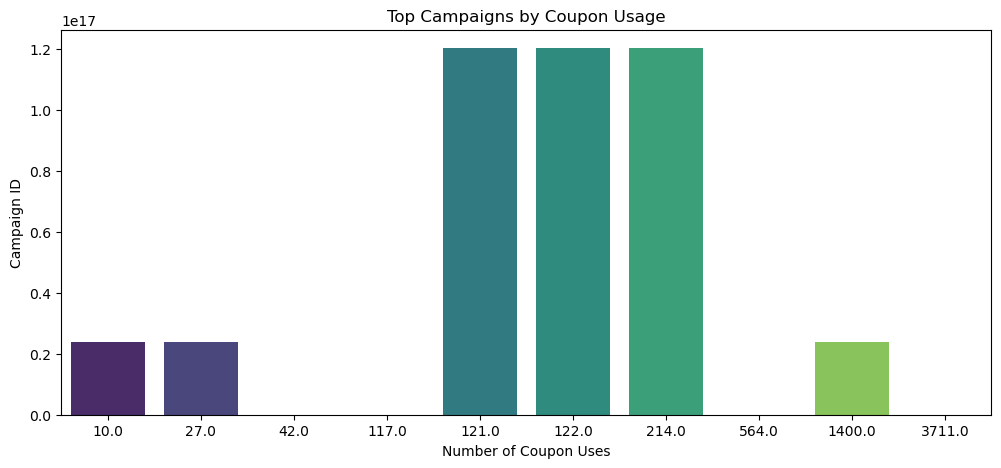

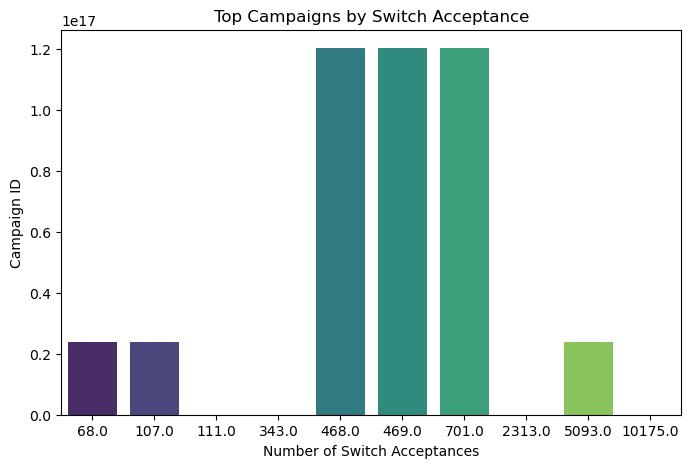

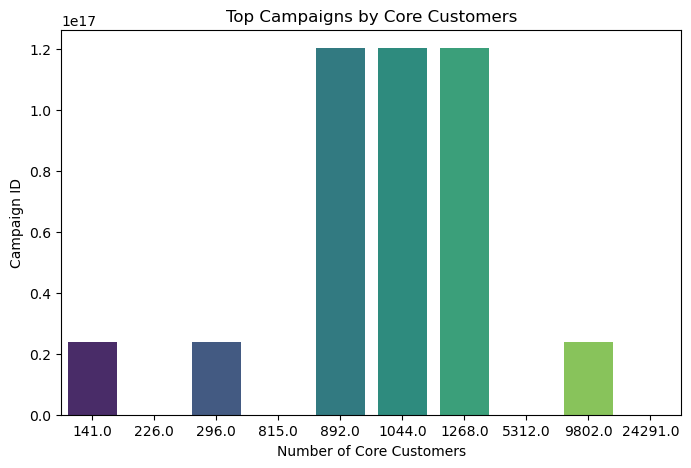

In [151]:
top_campaigns_by_revenue = campaign_metrics.sort_values(by='Total Revenue', ascending=False).head(10)

# Plotting the top campaigns by total revenue
plt.figure(figsize=(12, 5))
sns.barplot(x='Total Revenue', y='Campaign ID', data=top_campaigns_by_revenue, palette='viridis')
plt.title('Top Campaigns by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Campaign ID')
plt.show()

# Plotting coupon usage by campaign
plt.figure(figsize=(12, 5))
sns.barplot(x='Coupon Usage', y='Campaign ID', data=top_campaigns_by_revenue, palette='viridis')
plt.title('Top Campaigns by Coupon Usage')
plt.xlabel('Number of Coupon Uses')
plt.ylabel('Campaign ID')
plt.show()

# Plotting switch acceptance by campaign
plt.figure(figsize=(8, 5))
sns.barplot(x='Switch Accepted', y='Campaign ID', data=top_campaigns_by_revenue, palette='viridis')
plt.title('Top Campaigns by Switch Acceptance')
plt.xlabel('Number of Switch Acceptances')
plt.ylabel('Campaign ID')
plt.show()

# Plotting core customers by campaign
plt.figure(figsize=(8, 5))
sns.barplot(x='Core Customers', y='Campaign ID', data=top_campaigns_by_revenue, palette='viridis')
plt.title('Top Campaigns by Core Customers')
plt.xlabel('Number of Core Customers')
plt.ylabel('Campaign ID')
plt.show()

5)Summarise key learning and business insight in brief.

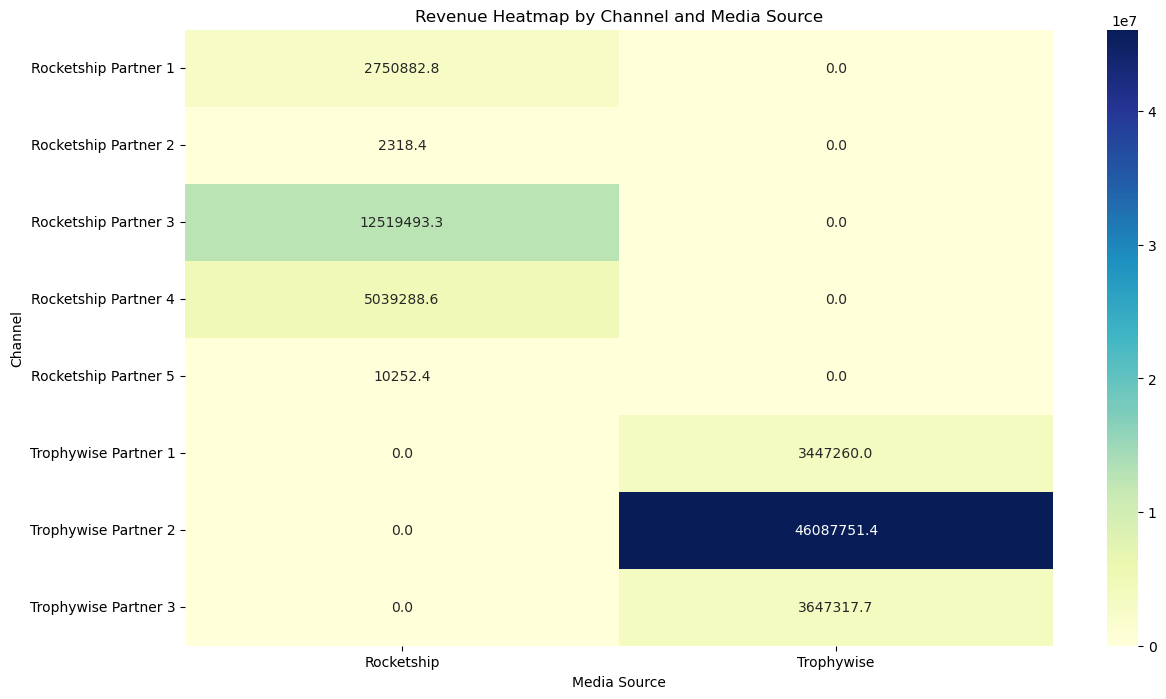

In [154]:
revenue_pivot = dt.pivot_table(values='Event Revenue', index='Channel', columns='Media Source', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(revenue_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Revenue Heatmap by Channel and Media Source')
plt.xlabel('Media Source')
plt.ylabel('Channel')
plt.show()

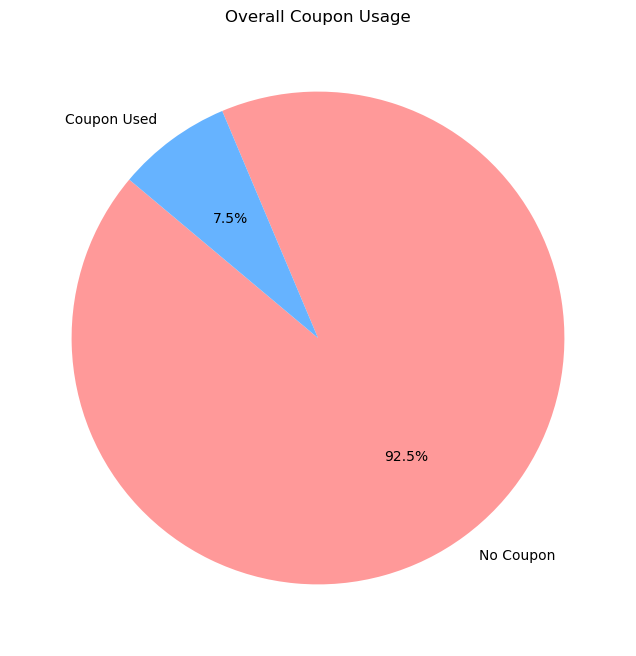

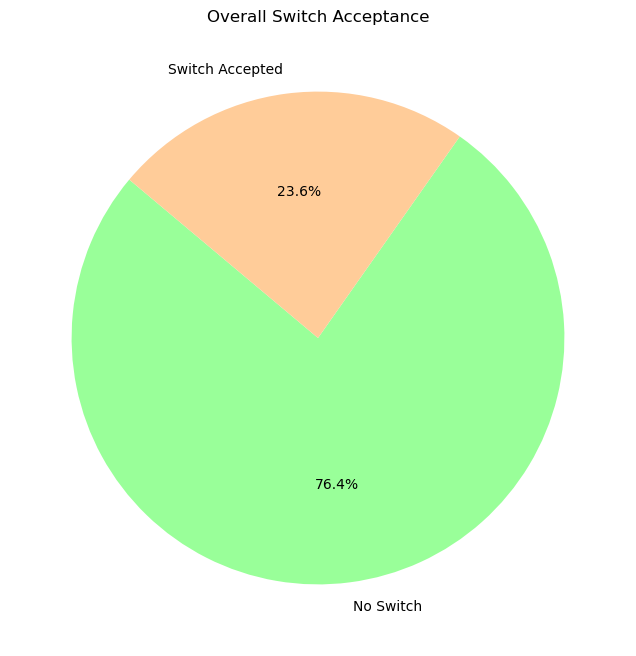

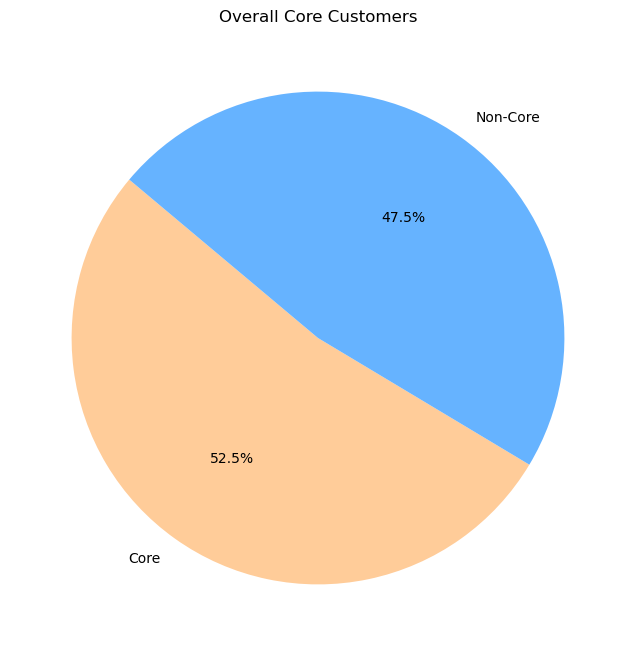

In [155]:
coupon_usage_summary = dt['coupon_applied'].apply(lambda x: 'Coupon Used' if x != 'none' else 'No Coupon').value_counts()

plt.figure(figsize=(8, 8))
coupon_usage_summary.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Overall Coupon Usage')
plt.ylabel('')
plt.show()

# Switch Acceptance Pie Chart
switch_acceptance_summary = dt['is_switch_added'].apply(lambda x: 'Switch Accepted' if x == 1 else 'No Switch').value_counts()

plt.figure(figsize=(8, 8))
switch_acceptance_summary.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ffcc99'])
plt.title('Overall Switch Acceptance')
plt.ylabel('')
plt.show()

# Core Customers Pie Chart
core_customers_summary = dt['is_core_customer'].apply(lambda x: 'Core' if x == 1 else 'Non-Core').value_counts()

plt.figure(figsize=(8, 8))
core_customers_summary.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ffcc99','#66b3ff'])
plt.title('Overall Core Customers')
plt.ylabel('')
plt.show()

**Recommendations**:


Focus on High-Revenue Channels and Media Sources: Allocate more budget and resources to channels and media sources that generate the most revenue.


Target High Engagement Regions: Increase promotional efforts in countries and states with higher coupon usage and switch acceptance.


Enhance Loyalty Programs: Strengthen loyalty programs in regions with a high number of core customers to further boost customer retention.


Refine Upsell Strategies: Analyze and replicate the successful elements of campaigns with high switch acceptance to improve overall sales and customer upgrades.